Pra Pemrosesan



In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path ke dataset
train_dir = 'D:/ADSA/KULIAH/SEMESTER 4/KECERDASAN BUATAN/Kecerdasan Buatan Klasifikasi Hewan Bagi Anak'

# Pra-pemrosesan data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training' 
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation' 
)


Found 791 images belonging to 3 classes.
Found 196 images belonging to 3 classes.


Arsitektur

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Melatih Model CNN


In [4]:
# Melatih Model CNN
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/50


c:\Users\agusa\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.3777 - loss: 3.1502 - val_accuracy: 0.4010 - val_loss: 1.2808
Epoch 2/50
 1/24 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5312 - loss: 1.9019

c:\Users\agusa\AppData\Local\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5312 - loss: 1.9019 - val_accuracy: 0.2500 - val_loss: 1.6612
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.4678 - loss: 1.8642 - val_accuracy: 0.4010 - val_loss: 2.4805
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4062 - loss: 1.5341 - val_accuracy: 0.2500 - val_loss: 2.8785
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.4642 - loss: 1.2689 - val_accuracy: 0.4010 - val_loss: 4.0495
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5938 - loss: 0.9810 - val_accuracy: 0.2500 - val_loss: 4.0950
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.4835 - loss: 1.1171 - val_accuracy: 0.3958 - val_loss: 4.8568
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5312 - loss: 1.0692 - val_accuracy: 0.5000 - val_loss: 3.0015
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.4912 - loss: 1.0441 - val_accuracy: 0.3958 - val_loss: 5.8203


Grafik

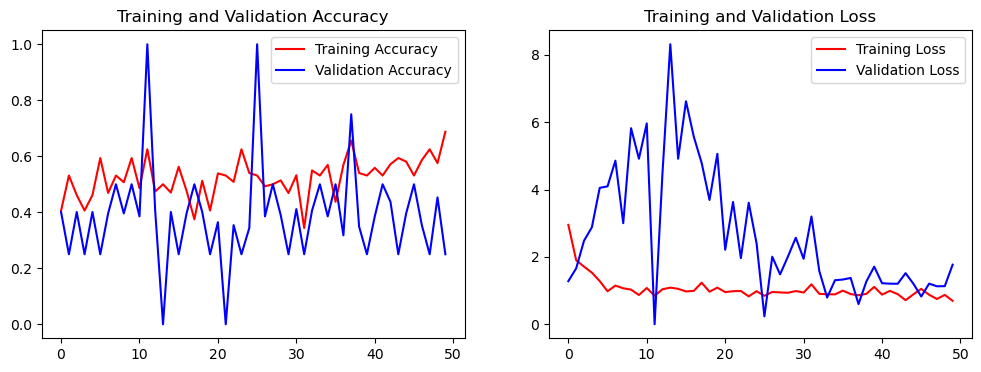

In [5]:
import matplotlib.pyplot as plt

# Menampilkan Grafik Akurasi dan Loss
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    
    plt.show()

plot_history(history)


Evaluasi Model

In [6]:
# Evaluasi model
eval_result = model.evaluate(validation_generator)
print(f"\nTest accuracy: {eval_result[1]*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.3786 - loss: 1.1777

Test accuracy: 37.24%
